In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('50_Startups.csv')

In [4]:
len(dataset)

50

In [5]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
dataset.shape

(50, 4)

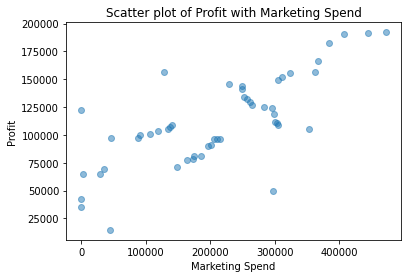

In [7]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

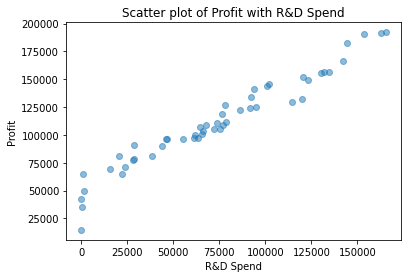

In [8]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


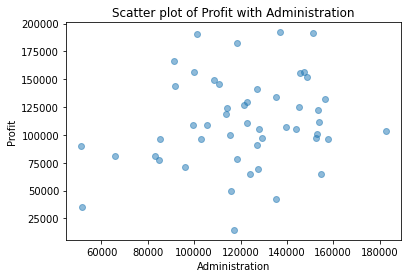

In [9]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()


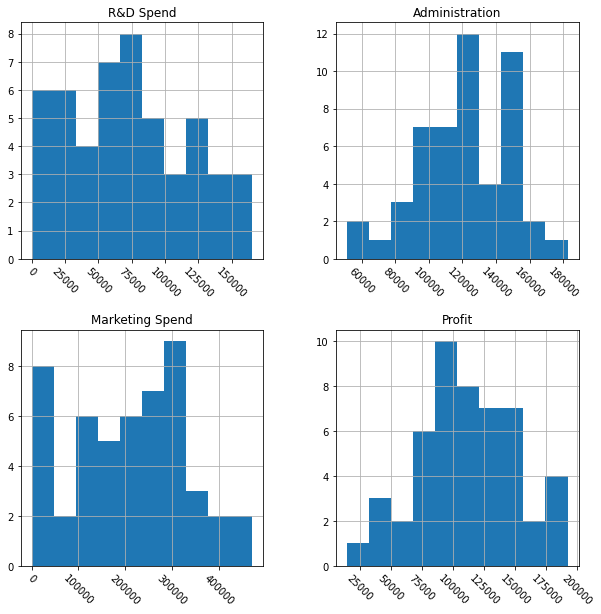

In [26]:
dataset.hist(xrot = -45, figsize=(10,10))
plt.show()

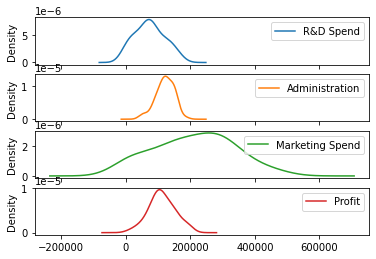

In [27]:
dataset.plot(kind='density', subplots=True, sharex=True)
plt.show()

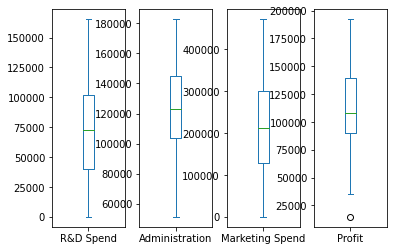

In [28]:
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

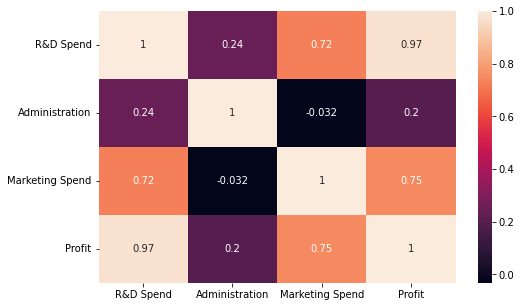

In [31]:
import seaborn as sns
plt.figure(figsize=(8,5))
correlation = dataset.corr().round(4)
sns.heatmap(data=correlation,annot=True)
plt.show()

In [32]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


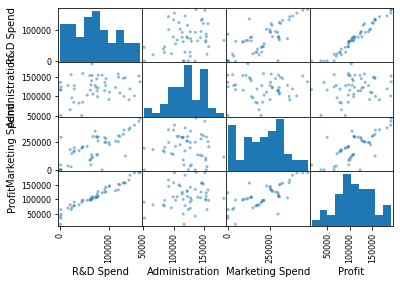

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

Text(0, 0.5, 'Profit')

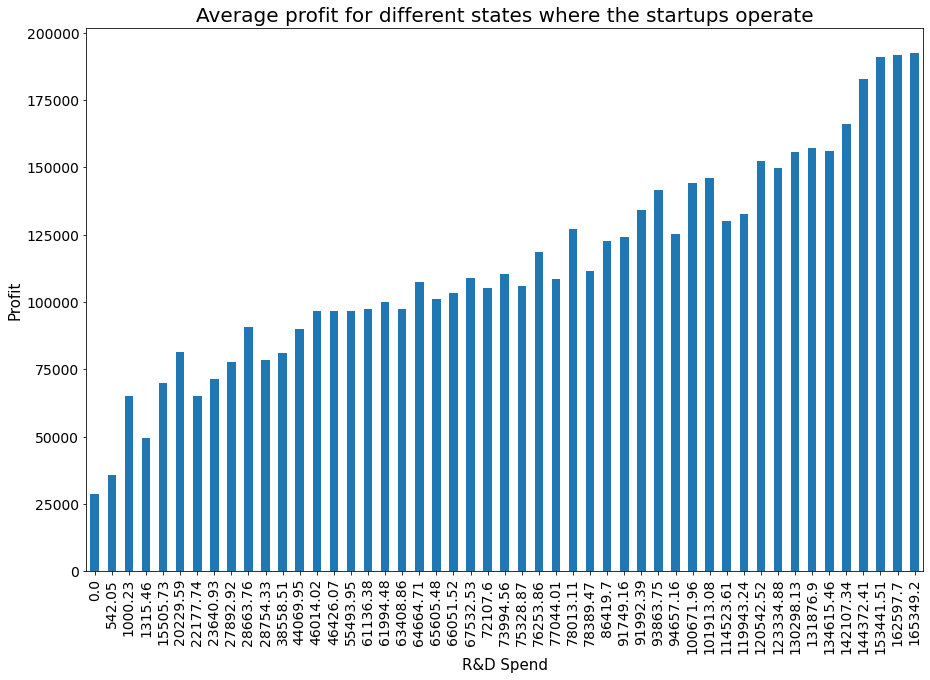

In [10]:
#Create the figure object
ax =dataset.groupby(['R&D Spend'])['Profit'].mean().plot.bar(
    figsize = (15,10),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("R&D Spend", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [11]:
dataset.Profit.value_counts()

192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: Profit, dtype: int64

In [12]:
dependent_variable = 'Profit'


In [13]:
independent_variables = dataset.columns.tolist()

In [14]:
independent_variables.remove(dependent_variable)

In [15]:
independent_variables

['R&D Spend', 'Administration', 'Marketing Spend']

In [16]:
X = dataset[independent_variables].values

y = dataset[dependent_variable].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286],
       [0.2782839 , 0.3173015 , 0.43561799],
       [0.45557444, 0.87258866, 0.28413435],
       [0.2807759 , 1.        , 0.44680961],
       [0.55488118, 0.59103645, 0.62511553],
       [0.7880179 , 0.88568959, 0.68649342],
       [0.72539353, 0.98922572, 0.54370828],
       [0.0060492 , 0.6847981 , 0.0040356 ],
       [0.00327821, 0.00432296, 0.        ],
       [0.39676926, 0.95618996, 0.22709197]])

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
math.sqrt(mean_squared_error(y_test, y_pred))

8803.775790469332

In [23]:
r2_score(y_test, y_pred)

0.9393955917820572